# Compare Modeled and Measured Temperatures, Densities, and heights+densities to field observations

In [38]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
from tqdm import tqdm

from funcs.clean import clean

In [39]:
import os
fig_dir = '../../figures/'

In [40]:
meas = clean('../../data/snowschool/wx_data/winter_20_21.csv')

/home/zacharykeskinen/Documents/temp/src/analysis/funcs/clean.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wx[col] = wx[col].apply(pd.to_numeric, errors = 'ignore')


In [41]:
import json
import numpy as np
import pandas as pd
import plotly.express as px

fp = '../../modeling/output/v20220206/jsons/SnowSchool 1.timeline.json'
# Opening JSON file
f = open(fp,)
# returns JSON object as
# a dictionary
data = json.load(f)
# Closing file
f.close()

model = pd.DataFrame()
for profile in data['profiles']:
    model = model.append(profile, ignore_index= True)

In [42]:
model.iloc[3000].comments['elements'][0]['layers'][-1]['top']
model_depths = pd.DataFrame(index = meas.index, columns = ['hs'])
for i, r in model.iterrows():
    model_depths.loc[pd.to_datetime(r.date), 'hs']= r.comments['elements'][0]['layers'][-1]['top']/100
model_depths.hs = model_depths.hs.astype('f8')

In [43]:
print(f'Measured peak snowdepth: {meas.snow_depth_1.idxmax()}')
print(f'Modeled peak snowdepth: {model_depths.hs.idxmax()}')

Measured peak snowdepth: 2021-02-21 03:00:00+00:00
Modeled peak snowdepth: 2021-02-21 11:00:00+00:00


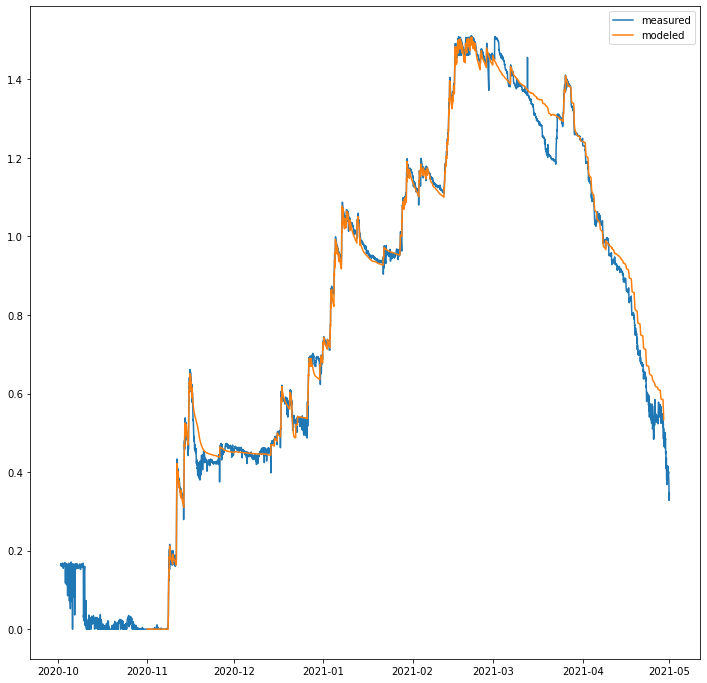

In [44]:
plt.figure(figsize = (12,12))
plt.plot(meas.snow_depth_1, label = 'measured')
plt.plot(model_depths, label = 'modeled')

plt.legend()
plt.savefig(os.path.join(fig_dir, 'hs_compare.png'))

## Temperature Compare

In [45]:
temp_cols = [col for col in meas.columns if 'airtemp' in col and '2.0' not in col]
a = 0
for i, col in enumerate(temp_cols):
    if i == 0:
        res = np.reshape(meas[col].values, (1, len(meas)))
    else:
        res = np.vstack((res, np.reshape(meas[col].values, (1, len(meas)))))
res = np.flipud(res)

In [46]:
meas.index[0]

Timestamp('2020-10-02 00:00:00+0000', tz='UTC')

<ipython-input-47-055ca3554f27>:14: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm=DivergingNorm(0))
<ipython-input-47-055ca3554f27>:13: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  sp = ax.imshow(res, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmax = 15, vmin = -15, cmap = 'bwr',


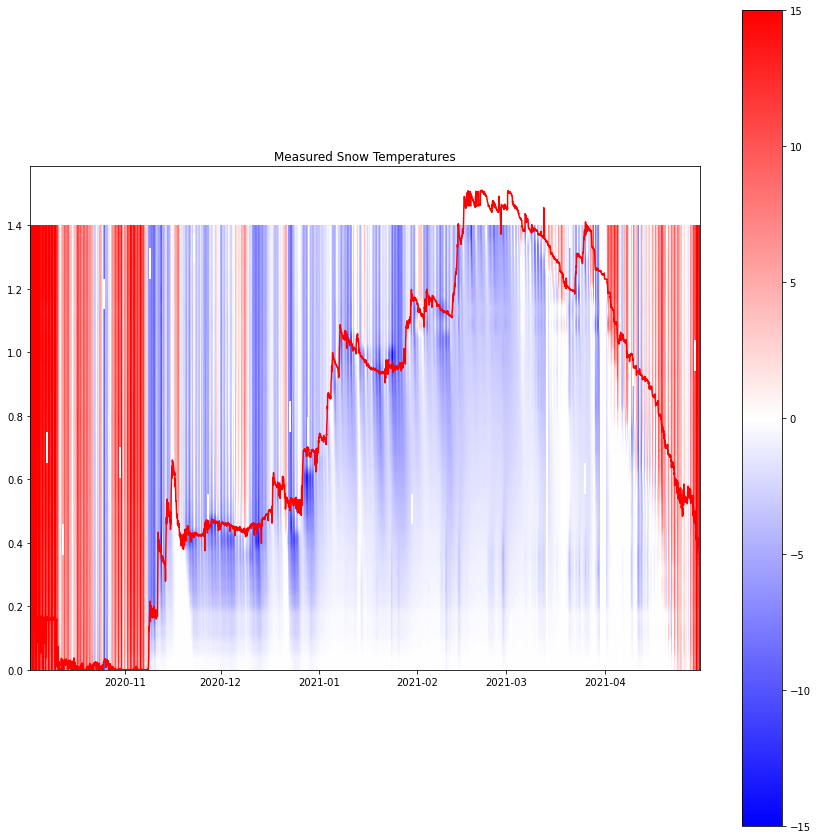

In [47]:
# Create your x-limits. Using two of your unix timestamps you first
# create a list of datetime.datetime objects using map.
x_lims = [meas.index[0],meas.index[-1]]

# You can then convert these datetime.datetime objects to the correct
# format for matplotlib to work with.
x_lims = mdates.date2num(x_lims)

# We tell Matplotlib that the x-axis is filled with datetime data, 
# this converts it from a float (which is the output of date2num) 
# into a nice datetime string.
f,ax = plt.subplots(1,1, figsize=(15,15))
sp = ax.imshow(res, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmax = 15, vmin = -15, cmap = 'bwr',
                  norm=DivergingNorm(0))
ax.plot(meas.snow_depth_1, color = 'red')
# ax.fill_between(range(len(meas)), meas.snow_depth_1.values, 1.5, facecolor ='white')
f.colorbar(sp)
plt.title('Measured Snow Temperatures')
ax.xaxis_date()

# We can use a DateFormatter to choose how this datetime string will look.
# I have chosen HH:MM:SS though you could add DD/MM/YY if you had data
# over different days.
date_format = mdates.DateFormatter('%H:%M:%S')

In [48]:
heights = np.linspace(0,1.4,29)
extracted_temps = pd.DataFrame(columns = heights, index = meas.index)
for i, r in tqdm(model.iterrows()):
    if type(r.temperature) is not float:
        for layer in r.temperature['elements'][0]['layers']:
            layer_heights = heights[(heights <= layer['top']/100) & (heights >= layer['bottom']/100)]
            if layer_heights.size > 0:
                for h in layer_heights:
                    extracted_temps.loc[pd.to_datetime(r.date), h] = layer['value']
mod_temp_arr = extracted_temps.values.astype('f8')
mod_temp_arr = np.rot90(mod_temp_arr)

4297it [00:23, 183.67it/s]


In [49]:
meas['top'] = 1.4

<ipython-input-50-2be2d0d38035>:4: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm=DivergingNorm(0))
<ipython-input-50-2be2d0d38035>:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  sp = ax.imshow(res, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmax = 5, vmin = -15, cmap = 'bwr',
<ipython-input-50-2be2d0d38035>:20: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm=DivergingNorm(0))
<ipython-input-50-2be2d0d38035>:19: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. 

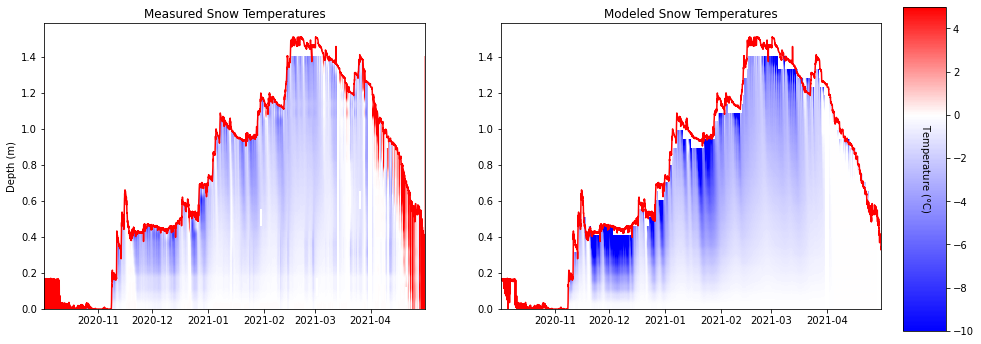

In [50]:
f,axes = plt.subplots(1,2, figsize=(15,15))
ax = axes[0]
sp = ax.imshow(res, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmax = 5, vmin = -15, cmap = 'bwr',
                  norm=DivergingNorm(0))
ax.plot(meas.snow_depth_1, color = 'red')
#ax.fill_between(range(x_lims[0],x_lims[1]), meas.snow_depth_1, 1.5, facecolor ='white')
ax.fill_between(meas.index, meas.snow_depth_1, 1.41, facecolor='white', alpha=1)
ax.title.set_text('Measured Snow Temperatures')
ax.xaxis_date()
# ax.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) 
ax.set_ylabel('Depth (m)')

ax = axes[1]
sp = ax.imshow(mod_temp_arr, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmax = 5, vmin = -10, cmap = 'bwr',
                  norm=DivergingNorm(0))
ax.plot(meas.snow_depth_1, color = 'red')
#ax.fill_between(range(len(meas)), meas.snow_depth_1.values, 1.5, facecolor ='white')
ax.title.set_text('Modeled Snow Temperatures')
ax.xaxis_date()

# f.subplots_adjust(right=0.9)
cbar_ax = f.add_axes([0.92, 0.35, 0.04, 0.3])
cbar = f.colorbar(sp, cax=cbar_ax)
cbar.set_label('Temperature ($\degree$C)', rotation=270, labelpad=-42)
plt.savefig(os.path.join(fig_dir, 'meas_model_temp.png'), dpi = 300)

<ipython-input-51-eccdbdc37b3b>:4: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm=DivergingNorm(0))
<ipython-input-51-eccdbdc37b3b>:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  sp = ax.imshow(res, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmax = 5, vmin = -15, cmap = 'bwr',
<ipython-input-51-eccdbdc37b3b>:20: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm=DivergingNorm(0))
<ipython-input-51-eccdbdc37b3b>:19: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. 

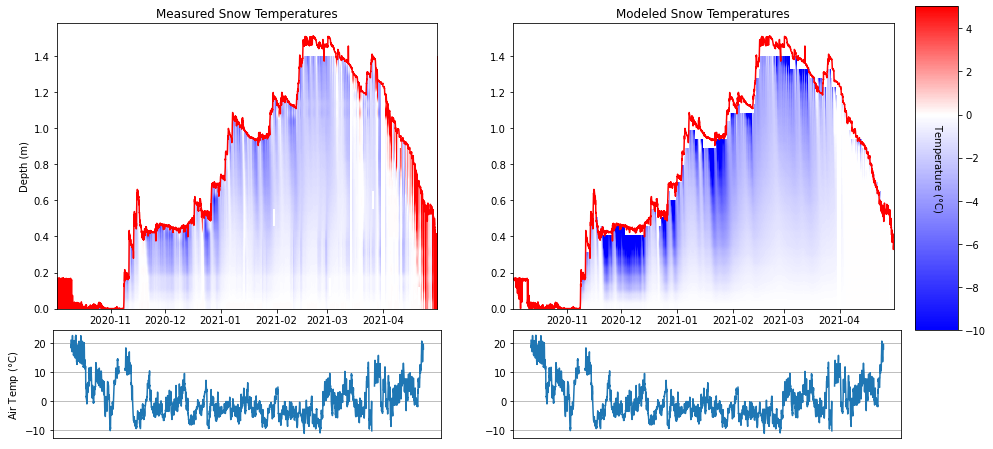

In [51]:
f,axes = plt.subplots(1,2, figsize=(15,15))
ax = axes[0]
sp = ax.imshow(res, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmax = 5, vmin = -15, cmap = 'bwr',
                  norm=DivergingNorm(0))
ax.plot(meas.snow_depth_1, color = 'red')
#ax.fill_between(range(x_lims[0],x_lims[1]), meas.snow_depth_1, 1.5, facecolor ='white')
ax.fill_between(meas.index, meas.snow_depth_1, 1.41, facecolor='white', alpha=1)
ax.title.set_text('Measured Snow Temperatures')
ax.xaxis_date()
# ax.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) 
ax.set_ylabel('Depth (m)')

ax = axes[1]
sp = ax.imshow(mod_temp_arr, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmax = 5, vmin = -10, cmap = 'bwr',
                  norm=DivergingNorm(0))
ax.plot(meas.snow_depth_1, color = 'red')
#ax.fill_between(range(len(meas)), meas.snow_depth_1.values, 1.5, facecolor ='white')
ax.title.set_text('Modeled Snow Temperatures')
ax.xaxis_date()

# f.subplots_adjust(right=0.9)
cbar_ax = f.add_axes([0.92, 0.35, 0.04, 0.3])
cbar = f.colorbar(sp, cax=cbar_ax)
cbar.set_label('Temperature ($\degree$C)', rotation=270, labelpad=-42)
airtemp_ax = f.add_axes([0.122, 0.25, 0.359, 0.1])
airtemp_ax.plot(meas['airtemp_2.0'])
airtemp_ax.set_ylabel('Air Temp ($\degree$C)')
airtemp_ax.set_xticks([])
airtemp_ax.grid()

airtemp_ax = f.add_axes([0.548, 0.25, 0.359, 0.1])
airtemp_ax.plot(meas['airtemp_2.0'])
airtemp_ax.set_xticks([])
airtemp_ax.grid()

plt.savefig(os.path.join(fig_dir, 'meas_model_temp.png'), dpi = 300)

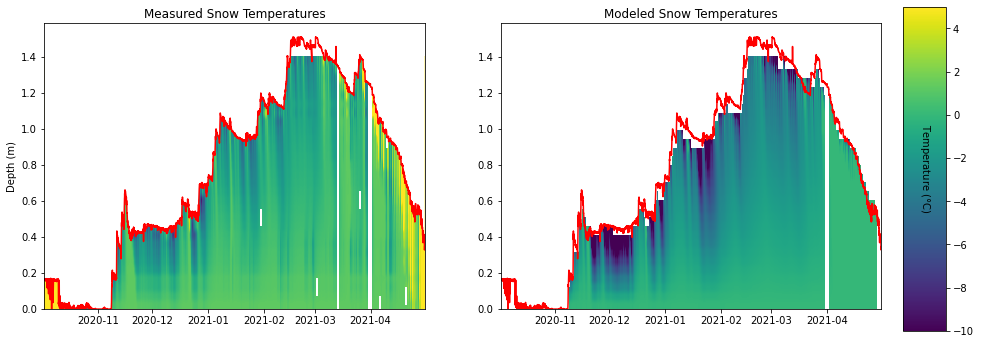

In [52]:
f,axes = plt.subplots(1,2, figsize=(15,15))
ax = axes[0]
sp = ax.imshow(res, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmax = 5, vmin = -15)
ax.plot(meas.snow_depth_1, color = 'red')
#ax.fill_between(range(x_lims[0],x_lims[1]), meas.snow_depth_1, 1.5, facecolor ='white')
ax.fill_between(meas.index, meas.snow_depth_1, 1.41, facecolor='white', alpha=1)
ax.title.set_text('Measured Snow Temperatures')
ax.xaxis_date()
# ax.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) 
ax.set_ylabel('Depth (m)')

ax = axes[1]
sp = ax.imshow(mod_temp_arr, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmax = 5, vmin = -10)
ax.plot(meas.snow_depth_1, color = 'red')
#ax.fill_between(range(len(meas)), meas.snow_depth_1.values, 1.5, facecolor ='white')
ax.title.set_text('Modeled Snow Temperatures')
ax.xaxis_date()

# f.subplots_adjust(right=0.9)
cbar_ax = f.add_axes([0.92, 0.35, 0.04, 0.3])
cbar = f.colorbar(sp, cax=cbar_ax)
cbar.set_label('Temperature ($\degree$C)', rotation=270, labelpad=-42)
plt.savefig(os.path.join(fig_dir, 'meas_model_temp_nondiver.png'), dpi = 300)

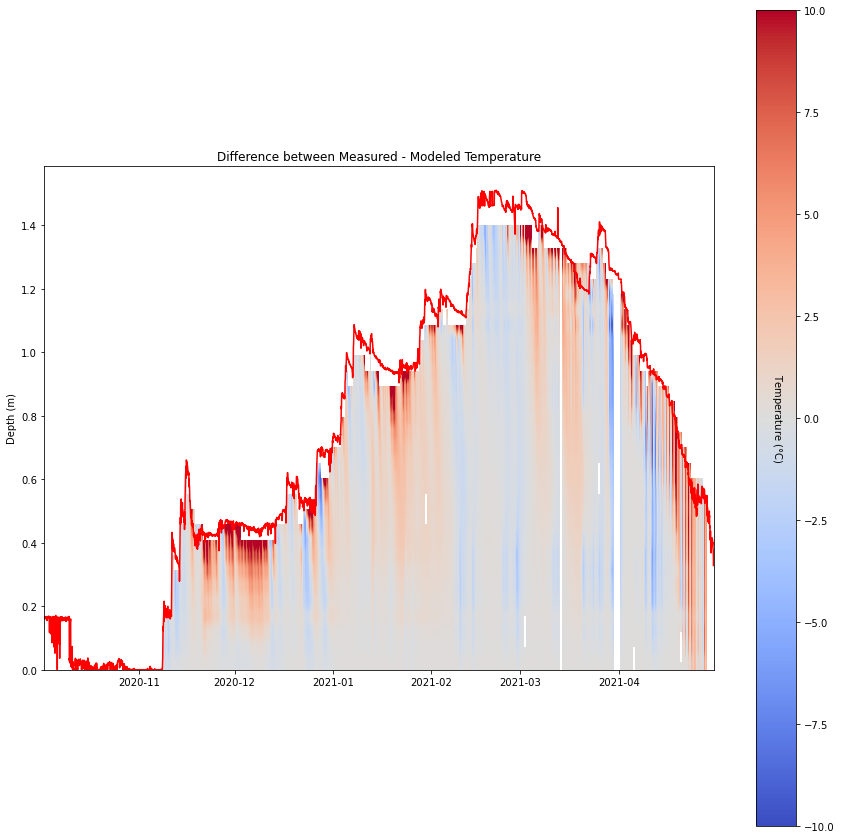

In [53]:
plt.figure(figsize=(15,15))
diff = res-mod_temp_arr
plt.imshow(diff, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmin = -10, vmax = 10, cmap = 'coolwarm')
plt.plot(meas.snow_depth_1, color = 'red')
cbar = plt.colorbar()
cbar.set_label('Temperature ($\degree$C)', rotation=270, labelpad=-50)
plt.title('Difference between Measured - Modeled Temperature')
plt.ylabel('Depth (m)')
ax.xaxis_date()

plt.savefig(os.path.join(fig_dir, 'meas_model_temp_diff.png'), dpi = 300)

## Density Compare

### Modeled:

In [54]:
heights = np.linspace(0,1.4,29)
extracted_densities = pd.DataFrame(columns = heights, index = meas.index)
for i, r in tqdm(model.iterrows()):
    if type(r.density) is not float:
        for layer in r.density['elements'][0]['layers']:
            layer_heights = heights[(heights <= layer['top']/100) & (heights >= layer['bottom']/100)]
            if layer_heights.size > 0:
                for h in layer_heights:
                    extracted_densities.loc[pd.to_datetime(r.date), h] = layer['value']
den_arr = extracted_densities.values.astype('f8')
den_arr = np.rot90(den_arr)

4297it [00:23, 186.26it/s]


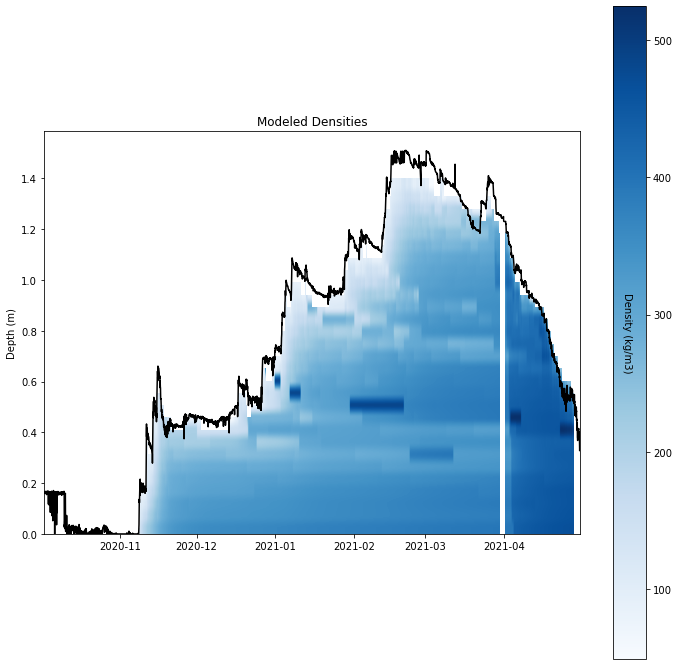

In [55]:
f = plt.figure(figsize = (12,12))
plt.imshow(den_arr, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), cmap = 'Blues')
plt.plot(meas.snow_depth_1, color = 'black')
plt.title('Modeled Densities')
plt.ylabel('Depth (m)')
ax.xaxis_date()
cbar = plt.colorbar()
cbar.set_label('Density (kg/m3)', rotation=270, labelpad=-40)
plt.savefig(os.path.join(fig_dir, 'modeled_dens.png'))

In [56]:
extracted_ave_densities = pd.DataFrame(columns = ['density'], index = meas.index)
for i, r in tqdm(model.iterrows()):
    if type(r.density) is not float:
        dens_aver = 0
        for layer in r.density['elements'][0]['layers']:
            depth = layer['top'] - layer['bottom']
            dens_aver += depth*layer['value']/r.density['elements'][0]['layers'][-1]['top']
        extracted_ave_densities.loc[pd.to_datetime(r.date), 'density'] = dens_aver

4297it [00:03, 1227.17it/s]


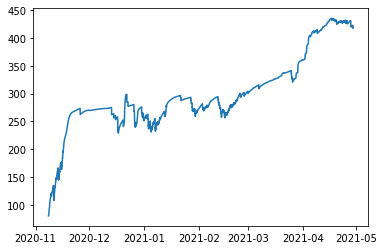

In [57]:
plt.plot(extracted_ave_densities)

### Measured:

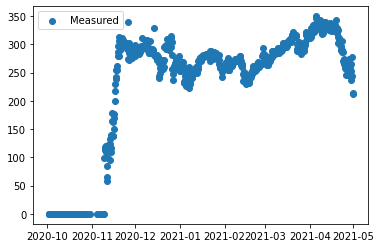

In [58]:
plt.scatter(x = meas.index, y = meas.snow_water_equiv_1 / meas.snow_depth_1, label = 'Measured')
plt.legend()

## Combined Densities

In [59]:
meas.snow_depth_1

date_time
2020-10-02 00:00:00+00:00    0.163068
2020-10-02 01:00:00+00:00    0.165100
2020-10-02 02:00:00+00:00    0.164084
2020-10-02 03:00:00+00:00    0.164084
2020-10-02 04:00:00+00:00    0.166878
                               ...   
2021-04-30 19:00:00+00:00    0.375920
2021-04-30 20:00:00+00:00    0.355092
2021-04-30 21:00:00+00:00    0.327914
2021-04-30 22:00:00+00:00    0.334010
2021-04-30 23:00:00+00:00    0.345948
Name: snow_depth_1, Length: 5079, dtype: float64

In [60]:
meas.snow_water_equiv_1/1000

date_time
2020-10-02 00:00:00+00:00     NaN
2020-10-02 01:00:00+00:00    0.00
2020-10-02 02:00:00+00:00     NaN
2020-10-02 03:00:00+00:00     NaN
2020-10-02 04:00:00+00:00     NaN
                             ... 
2021-04-30 19:00:00+00:00    0.08
2021-04-30 20:00:00+00:00     NaN
2021-04-30 21:00:00+00:00     NaN
2021-04-30 22:00:00+00:00     NaN
2021-04-30 23:00:00+00:00     NaN
Name: snow_water_equiv_1, Length: 5079, dtype: float64

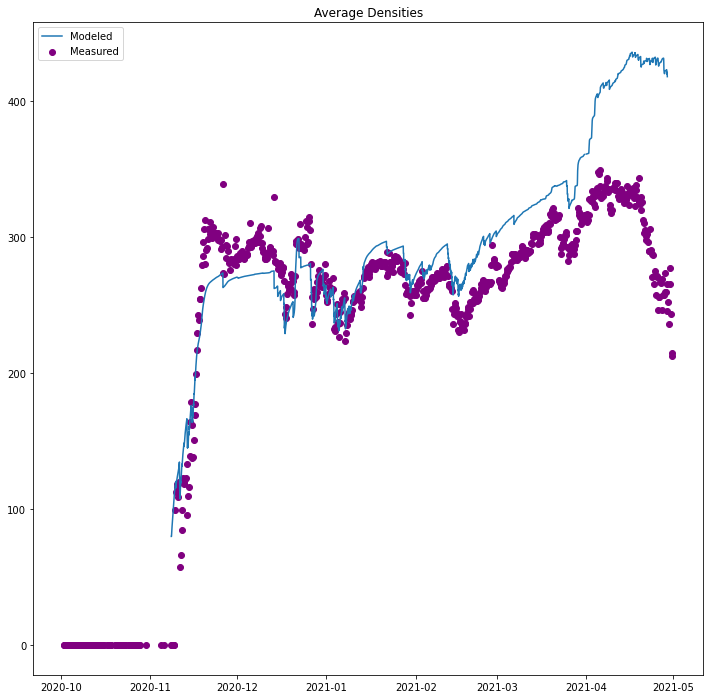

In [61]:
f = plt.figure(figsize = (12,12))
plt.plot(extracted_ave_densities, label = 'Modeled')
meas.loc[:, 'ave_density'] = meas.snow_water_equiv_1 / meas.snow_depth_1
plt.scatter(x = meas.index, y = meas.ave_density, label = 'Measured', color = 'purple')
plt.legend()
plt.title('Average Densities')
plt.savefig(os.path.join(fig_dir, 'modeled_dens.png'))

## Cold Content

In [62]:
ci = 2.1e-3
Tm = 0

def cc_calc(ps, ds, Ts):
    return ci*ps*ds*(Ts-Tm)

### modeled

In [63]:
modeled_temps = pd.DataFrame(mod_temp_arr, columns = meas.index).T
modeled_temps.columns = np.linspace(1.4,0,29)

In [64]:
extracted_ave_densities.loc['2020-12-01'].mean()

density    270.017518
dtype: float64

In [65]:
modeled_temps.loc['2020-12-01'].mean().dropna().mean()

-5.972875

In [66]:
cc_df = pd.DataFrame(index = meas.index, columns = ['modeled', 'measured'])
for i, r in modeled_temps.resample('D').mean().iterrows():
    ps = extracted_ave_densities.loc[i]
    Ts = r.mean()
    ds = model_depths.loc[i, 'hs']
    cc_df.loc[i, 'modeled'] = cc_calc(ps, ds, Ts).values

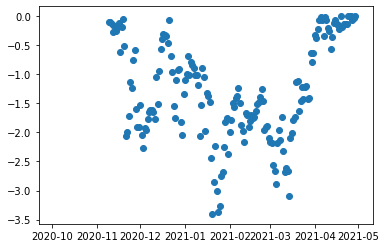

In [67]:
plt.scatter(x = cc_df.index, y = cc_df.modeled)

### Measured

In [68]:
meas_temps = pd.DataFrame(res, columns = meas.index).T
meas_temps.columns = np.linspace(1.4,0,29)

In [69]:
for col in meas_temps.columns:
    print(col)

1.4
1.3499999999999999
1.2999999999999998
1.25
1.2
1.15
1.0999999999999999
1.0499999999999998
1.0
0.95
0.8999999999999999
0.85
0.7999999999999999
0.75
0.7
0.65
0.6
0.5499999999999999
0.5
0.44999999999999996
0.4
0.3500000000000001
0.30000000000000004
0.25
0.19999999999999996
0.1499999999999999
0.10000000000000009
0.050000000000000044
0.0


In [70]:
for i, r in meas_temps.iterrows():
    ps = meas.loc[i, 'ave_density']
    Ts = r[(r.index<meas.loc[i, 'snow_depth_1']) & (r < 0)].mean()
    ds = meas.loc[i, 'snow_depth_1']
    cc_df.loc[i, 'measured'] = cc_calc(ps, ds, Ts)

In [71]:
cc_df.modeled = cc_df.modeled.astype('f8')
cc_df.measured = cc_df.measured.astype('f8')

In [72]:
cc_df = cc_df.resample('D').mean()

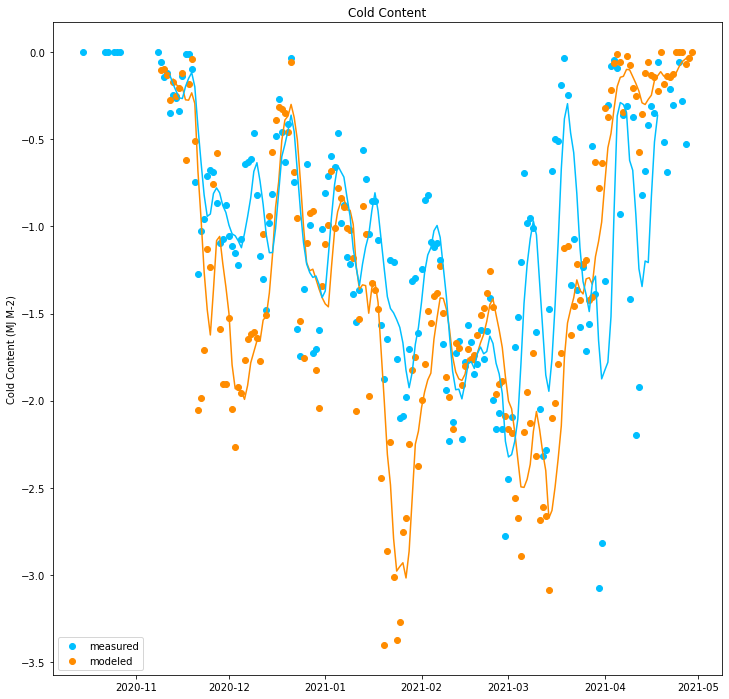

In [73]:
plt.figure(figsize = (12,12))
plt.scatter(x = cc_df.index, y = cc_df.measured, label = 'measured', color = 'deepskyblue')
plt.scatter(x = cc_df.index, y = cc_df.modeled, label = 'modeled', color = 'darkorange')

plt.plot(cc_df.rolling(window = 5).mean().modeled, color = 'darkorange')
plt.plot(cc_df.rolling(window = 5).mean().measured, color = 'deepskyblue')

plt.ylabel('Cold Content (MJ M-2)')
plt.title('Cold Content')
plt.legend()
plt.savefig(os.path.join(fig_dir, 'cold_content_compare.png'))

Text(0, 0.5, 'Cold Content (MJ M-2)')

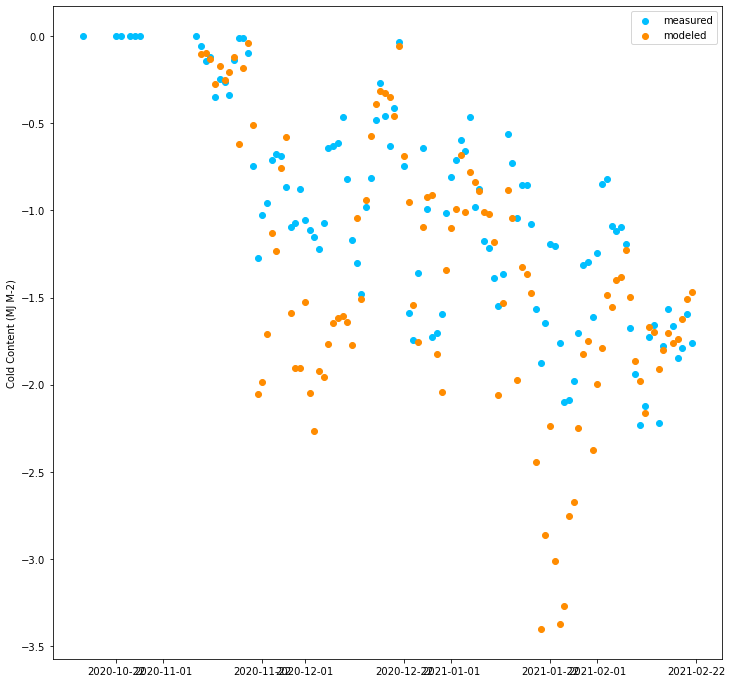

In [74]:
plt.figure(figsize = (12,12))
cc_df_cold = cc_df[cc_df.index < meas.snow_depth_1.idxmax()]
plt.scatter(x = cc_df_cold.index, y = cc_df_cold.measured, label = 'measured', color = 'deepskyblue')
plt.scatter(x = cc_df_cold.index, y = cc_df_cold.modeled, label = 'modeled', color = 'darkorange')
plt.legend()
plt.ylabel('Cold Content (MJ M-2)')

## Peak SWE date and amount and snowmelt rate